In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv('online.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [111]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<Figure size 1080x576 with 0 Axes>

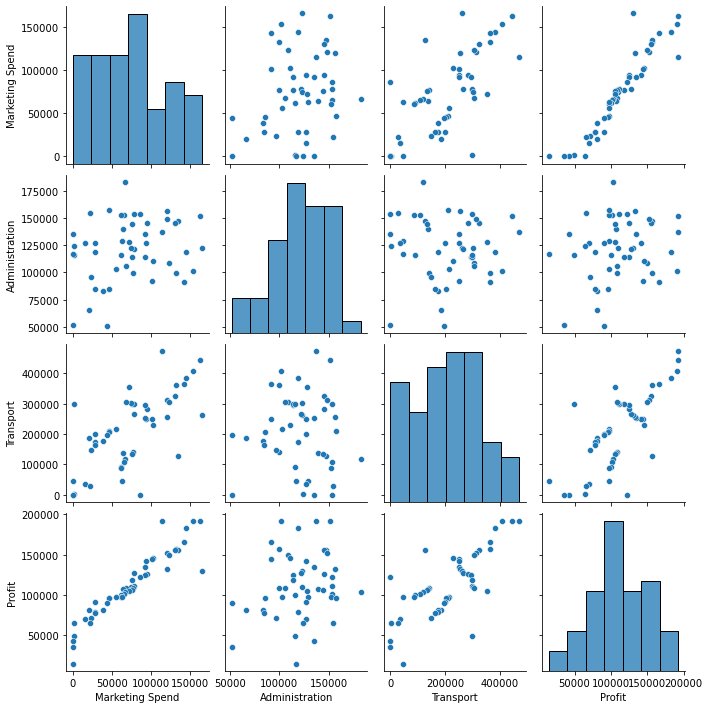

In [113]:
plt.figure(figsize = (15,8))
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Transport'}>,
        <AxesSubplot:title={'center':'Area'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

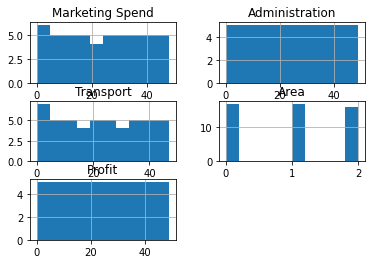

In [138]:
df.hist()

In [114]:
df.shape

(50, 5)

In [115]:
cat = ['Area']
enc = LabelEncoder()
for x in cat:
    df[x] = enc.fit_transform(df[x])

df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [116]:
x = df.drop(['Area'], axis = 1)
y = df['Profit'] # a dependent varaibe will always relationship with all the variables in the table unlike independent variable

In [117]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.10, random_state = 1)

In [119]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [120]:
pred = model.predict(x_test)
pred

array([105008.31,  96479.51,  78239.91,  81229.06, 191050.39])

In [121]:
y_test

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
Name: Profit, dtype: float64

In [122]:
print(r2_score(y_test,pred))

1.0


In [123]:
print(mean_absolute_error(y_test,pred))

5.820766091346741e-11


In [124]:
print(mean_squared_error(y_test,pred))

4.3198680309969314e-21


In [125]:
print(np.sqrt(mean_squared_error(y_test,pred)))

6.572570297073232e-11


In [127]:
coef = pd.DataFrame(data = model.coef_, index = x.columns, columns = ['COEF'])
coef

,COEF
Marketing Spend,-1.131947e-15
Administration,1.735525e-15
Transport,3.627896e-16
Profit,1.000000e+00
